# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

## **1. Collecting Data** 

### About Dataset
- The dataset provides historical sales data of an electronics company, encompassing 16 distinct features to analyze business performance.
- The analysis focuses on identifying sales trends, evaluating product performance, and assessing customer loyalty to optimize marketing efforts, enhance engagement, and drive growth in the electronics category.

## **2. Exploring Data Analysis (EDA)**

### 2.1 Overal Dataset view

#### Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Read dataset

In [2]:
df = pd.read_csv('Data/sales.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


#### Data shape

In [4]:
rows, cols = df.shape

print(f'Number of rows: {rows}')
print(f'Number of cols: {cols}')

Number of rows: 20000
Number of cols: 16


Dataset have 20000 rows and 16 columns.

### 2.2 Row Detail

##### Row meaning 
- The dataset comprises sales information for individual transactions, with each row corresponding to a unique purchase record. Each record includes detailed transaction-related data, providing insights into customer behavior, product performance, and sales metrics. The dataset is structured such that each row represents a comprehensive snapshot of a single transaction, enabling a thorough analysis of sales trends and factors specific to each purchase.

##### Check duplicate

In [5]:
dup_rows = df[df.duplicated()]

print(f'Number of duplicated rows: {len(dup_rows)}')

Number of duplicated rows: 0


The dataset has no duplicates row.

### 2.3 Column Detail

In [6]:
descriptions = pd.read_csv('Data/description.csv')

pd.set_option('display.max_colwidth', None)
descriptions

,Feature,Description
0,Customer ID,Unique identifier for each customer
1,Age,Age of the customer (numeric)
2,Gender,Gender of the customer (Male or Female)
3,Loyalty Member,"(Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)"
4,Product Type,"Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)"
5,SKU,a unique code for each product
6,Rating,Customer rating of the product (1-5 stars) (Should have no Null Ratings)
7,Order Status,"Status of the order (Completed, Cancelled)"
8,Payment Method,"Method used for payment (e.g., Cash, Credit Card, Paypal)"
9,Total Price,Total price of the transaction (numeric)


In [7]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

In [8]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%Y-%m-%d')

df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Loyalty Member               object
Product Type                 object
SKU                          object
Rating                        int64
Order Status                 object
Payment Method               object
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type                object
Add-ons Purchased            object
Add-on Total                float64
dtype: object

In [8]:
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna(value='None')

df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


#### Detail column types

In [9]:
first_row = df.iloc[0]

types = {'column': [], 'type': []}
for col, val in first_row.items():
    types['column'].append(col)
    types['type'].append(type(val))

types_df = pd.DataFrame(types)
types_df['type'] = types_df['type'].astype(str).str.split("'").str[1]

types_df

,column,type
0,Customer ID,numpy.int64
1,Age,numpy.int64
2,Gender,str
3,Loyalty Member,str
4,Product Type,str
5,SKU,str
6,Rating,numpy.int64
7,Order Status,str
8,Payment Method,str
9,Total Price,numpy.float64


### 2.4 Distribution Value

#### Distribution of numeric values
##### Description

- For columns with numeric data types, we calculate:

    - missing_ratio: Percentage (from 0 to 100) of missing values
    - standard_deviation: Standard deviation
    - min: The min
    - lower_quartile: The lower quartile
    - median: The median
    - upper_quartile: The upper quartile
    - max: The max

In [10]:
num_col_df = df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
missing_ratio,0.0,0.0,0.0,0.00,0.00,0.0,0.00
min,1000.0,18.0,1.0,20.75,20.75,1.0,0.00
lower_quartile,5478.0,33.0,2.0,1139.70,361.20,3.0,7.60
median,10499.5,49.0,3.0,2534.50,464.00,5.0,51.70
upper_quartile,15504.0,65.0,4.0,4639.60,791.20,8.0,93.80
max,19998.0,80.0,5.0,11396.80,1139.68,10.0,292.77


- The range value of each columns:

In [11]:
min_max_info = num_col_df.agg(["min", "max"])
min_max_info

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
min,1000,18,1,20.75,20.75,1,0.00
max,19998,80,5,11396.80,1139.68,10,292.77


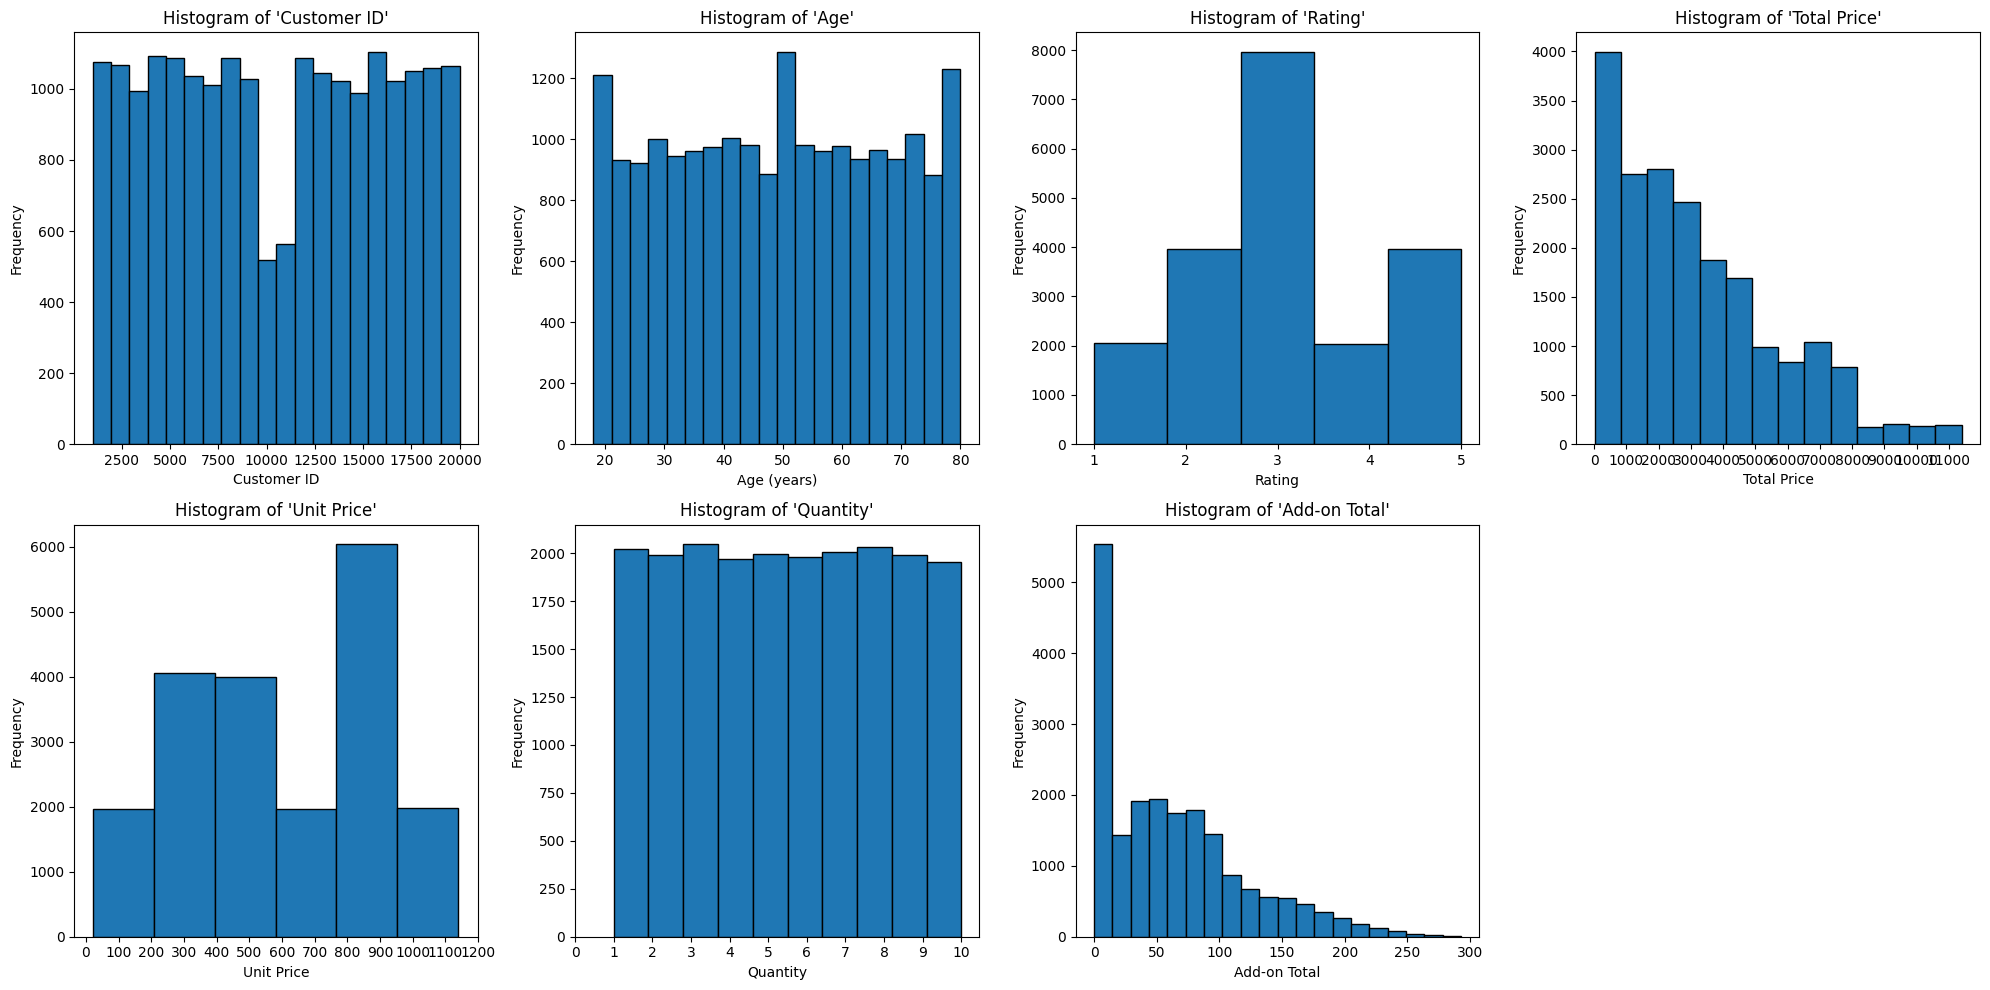

In [12]:
column_config = {
    'Customer ID': {'bins': 20, 'unit': '', 'xticks': None},
    'Age': {'bins': 20, 'unit': 'years', 'xticks': None},
    'Rating': {'bins': 5, 'unit': '', 'xticks': range(1, 6)},
    'Total Price': {
        'bins': 14,
        'unit': '',
        'xticks': range(0, int(num_col_df['Total Price'].max()) + 200, 1000),
    },
    'Unit Price': {
        'bins': 6,
        'unit': '',
        'xticks': range(0, int(num_col_df['Unit Price'].max()) + 100, 100),
    },
    'Quantity': {
        'bins': None,
        'unit': '',
        'xticks': range(0, int(num_col_df['Quantity'].max()) + 1),
    },
    'Add-on Total': {'bins': 20, 'unit': '', 'xticks': None},
}

# Xác định số hàng và cột
num_cols = 4
num_rows = (len(column_config) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

# Vẽ biểu đồ histogram
for i, (col, config) in enumerate(column_config.items()):
    bins = config['bins']
    unit = config['unit']
    xticks = config['xticks']

    axes[i].hist(num_col_df[col], bins=bins, edgecolor='black')
    axes[i].set_title(f"Histogram of '{col}'")
    axes[i].set_xlabel(f"{col} ({unit})" if unit else col)
    axes[i].set_ylabel('Frequency')

    if xticks:
        axes[i].set_xticks(xticks)

# Xóa các trục thừa nếu không sử dụng hết
for i in range(len(column_config), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## **3. Asking Meaning Questions** 

## **4. Pre-processing & Analyzing Data to Answer each Questions** 

## **5. Reflection**

## **References**